Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'TRX'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2017-09-12,0.002051,0.002447,0.001711,0.001988,0.001988,48512.0,TRX-USD
2017-09-13,0.002006,0.002479,0.001298,0.001427,0.001427,58770.0,TRX-USD
2017-09-14,0.001419,0.001831,0.001091,0.001801,0.001801,26475.0,TRX-USD
2017-09-15,0.001815,0.017671,0.001371,0.001831,0.001831,54535.0,TRX-USD
2017-09-16,0.001836,0.003879,0.001781,0.003320,0.003320,124998.0,TRX-USD
...,...,...,...,...,...,...,...
2021-07-03,0.066834,0.068182,0.065113,0.067298,0.067298,844766257.0,TRX-USD
2021-07-04,0.067330,0.067344,0.063691,0.064574,0.064574,798184866.0,TRX-USD
2021-07-05,0.064549,0.066369,0.064010,0.064935,0.064935,699504111.0,TRX-USD
2021-07-06,0.064975,0.065973,0.064291,0.064295,0.064295,742194463.0,TRX-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1395 entries, 2017-09-12 to 2021-07-08
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1391 non-null   float64
 1   high      1391 non-null   float64
 2   low       1391 non-null   float64
 3   close     1391 non-null   float64
 4   adjclose  1391 non-null   float64
 5   volume    1391 non-null   float64
 6   ticker    1395 non-null   object 
 7   spread    1391 non-null   float64
dtypes: float64(7), object(1)
memory usage: 98.1+ KB


## Plot the closing value of Tron over time

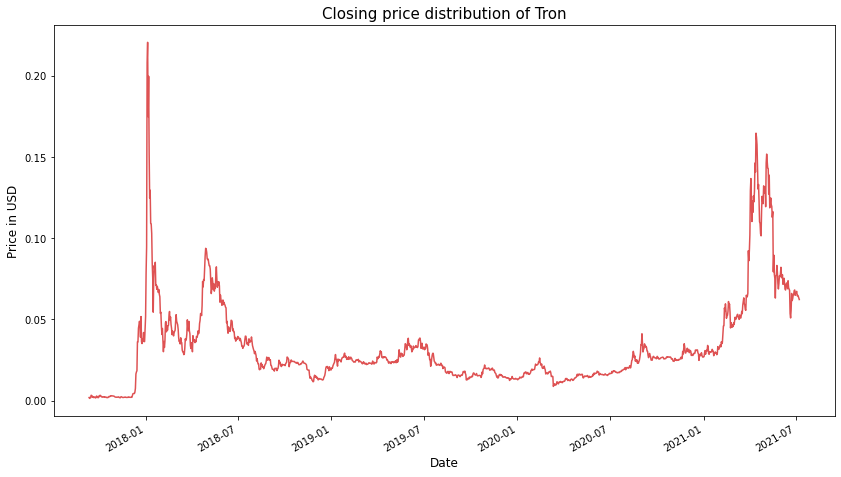

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Tron", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Daily price spread of Tron')

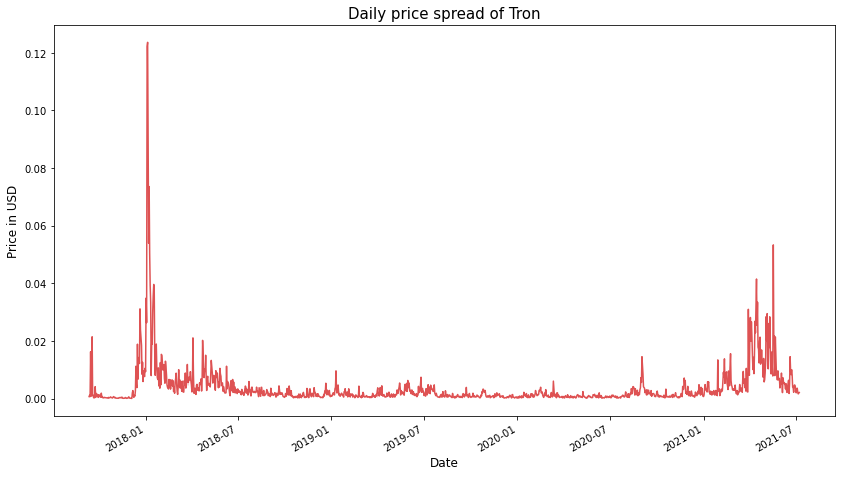

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of Tron", fontsize=15)

## Candlestick chart

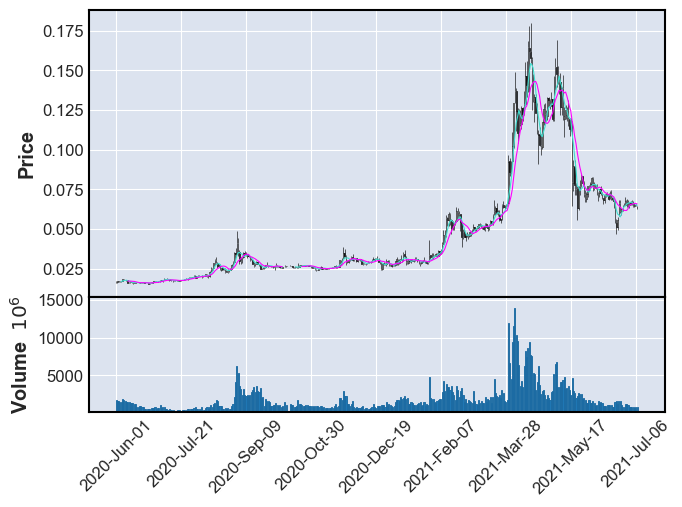

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2017-09-12,0.001988
1,2017-09-13,0.001427
2,2017-09-14,0.001801
3,2017-09-15,0.001831
4,2017-09-16,0.003320
...,...,...
1390,2021-07-03,0.067298
1391,2021-07-04,0.064574
1392,2021-07-05,0.064935
1393,2021-07-06,0.064295


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1416,2021-08-03,0.039634,0.022715,0.055870
1417,2021-08-04,0.039288,0.023004,0.056633
1418,2021-08-05,0.038923,0.021969,0.054674
1419,2021-08-06,0.038592,0.021329,0.054720
1420,2021-08-07,0.038012,0.020127,0.055835


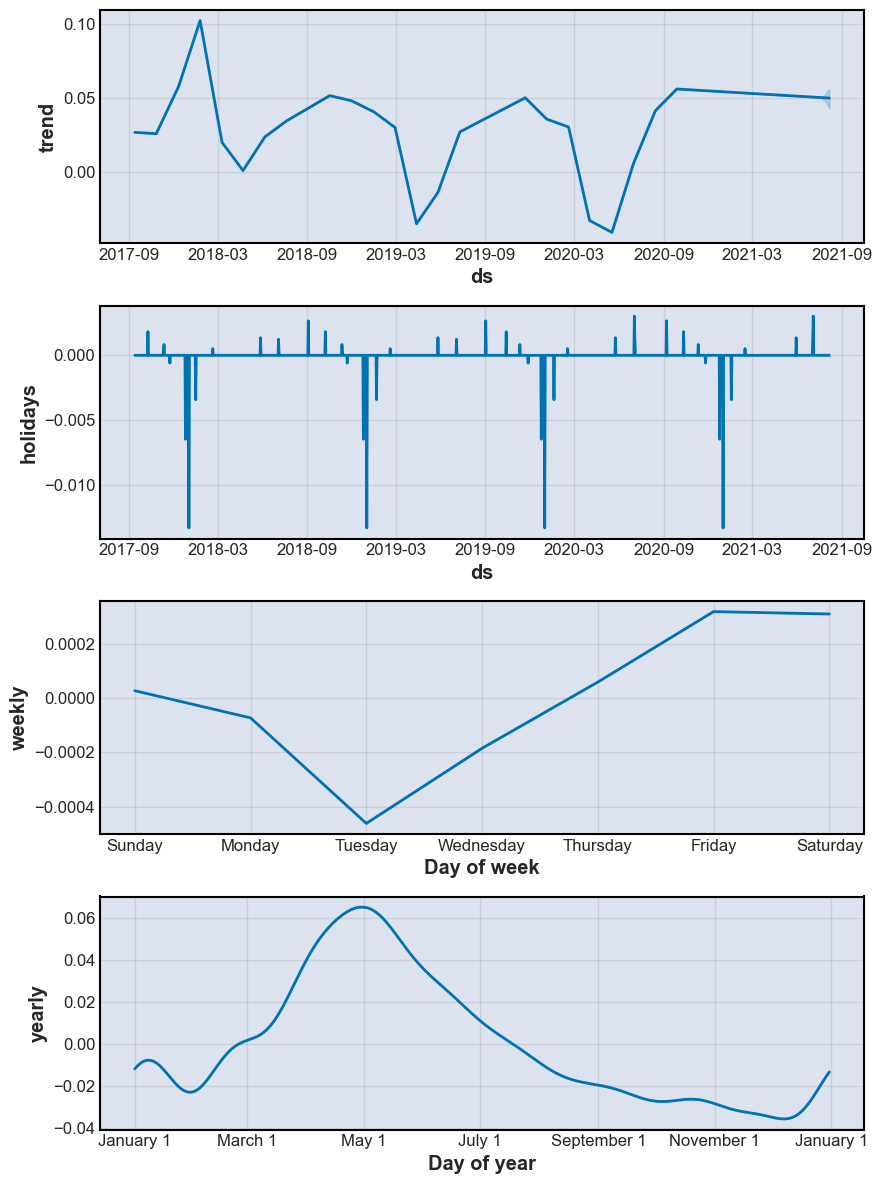

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

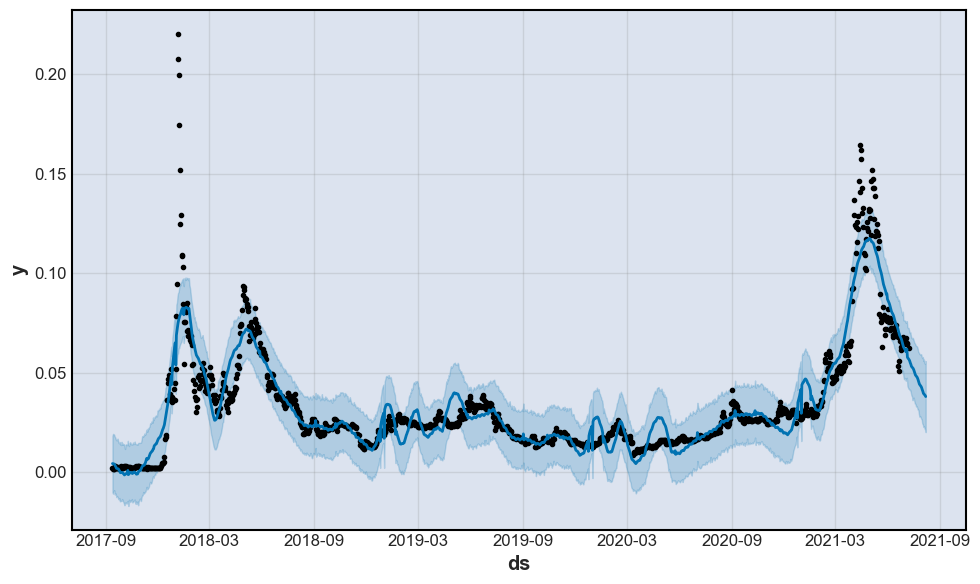

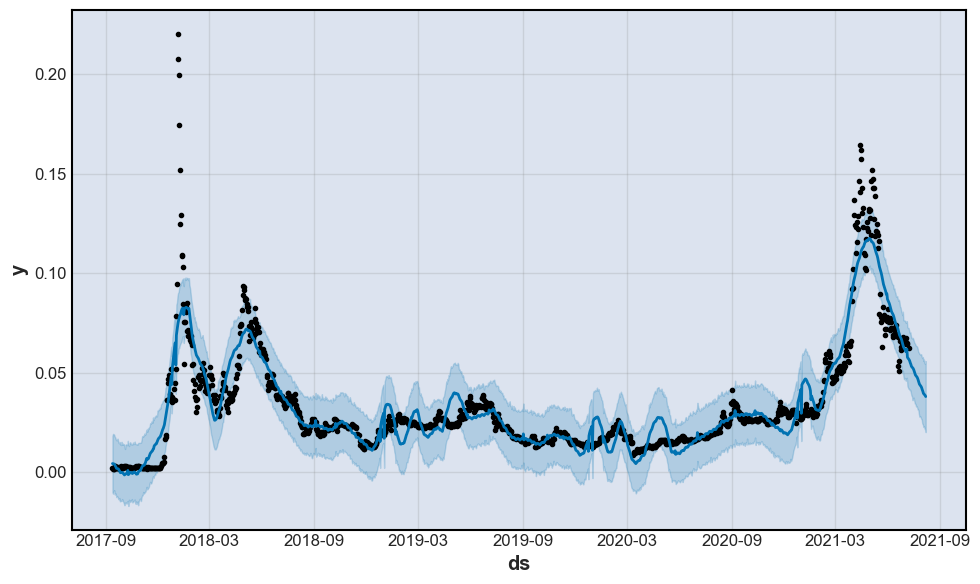

In [10]:
m.plot(forecast)